In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

import sklearn
print(sklearn.__version__)

1.3.1


In [21]:

# Load the CSV file
data = pd.read_csv('drag_traj1.csv')

# Extract the matrix of data
matrix = data.values

data.head()

# Pivot the DataFrame
data = data.melt(id_vars=['vel'], var_name='drag', value_name='x').astype('float64').dropna(axis= 0, how='any')

# Sort the DataFrame by 'foo' column
data.sort_values(['vel','drag'], ignore_index=True, inplace=True)

#pivoted_df = pivoted_df.dropna(subset=['c_l'])

# Display the pivoted DataFrame
print(data)
data.dtypes

,vel,6,8,10,15,20,25,30,40,50
0,5682.94130,440.45366,321.83364,244.80149,129.48958,82.70321,61.43667,34.75104,-8.29875,-54.97925
1,5897.17858,440.92628,327.50470,251.89034,137.05101,97.82607,77.50471,52.38591,10.89213,-33.71369
2,6101.52807,440.92628,332.70318,258.50660,151.70132,112.94894,92.15500,68.46474,29.56432,-14.00413
3,6312.46931,440.45366,336.48391,265.12287,167.29676,127.59922,109.16823,86.09960,48.75520,7.26142
4,6526.70659,440.92628,342.15498,272.21171,181.00188,142.72211,125.70889,103.73446,67.42739,27.48964


           vel  drag          x
0   5682.94130   6.0  440.45366
1   5682.94130   8.0  321.83364
2   5682.94130  10.0  244.80149
3   5682.94130  15.0  129.48958
4   5682.94130  20.0   82.70321
..         ...   ...        ...
94  7785.76272  20.0  232.98675
95  7785.76272  25.0  220.69942
96  7785.76272  30.0  205.91287
97  7785.76272  40.0  178.94193
98  7785.76272  50.0  150.41496

[99 rows x 3 columns]


vel     float64
drag    float64
x       float64
dtype: object

Text(0.5, 0, 'X')

Text(0.5, 0.5, 'vel')

Text(0.5, 0, 'drag')

Text(0.5, 0.92, 'traj')

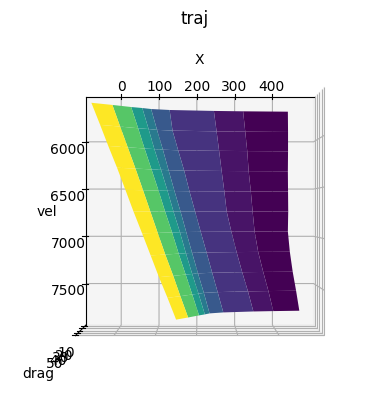

In [22]:
# Reshape the DataFrame into a pivot table
pivot_table = data.pivot(index='vel', columns='drag', values='x')

# Convert the data to a 2D numpy array
X = pivot_table.values


# Create the X and Y coordinate grids
D, V = np.meshgrid(pivot_table.columns, pivot_table.index)


# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface, ignoring NaN values
ax.plot_surface(X, V, D, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('vel')
ax.set_zlabel('drag')
ax.set_title('traj')


ax.invert_xaxis()

ax.view_init(90, 90)

# Show the plot
plt.show()

LinearRegression()

Text(0.5, 0, 'X_pred')

Text(0.5, 0.5, 'vel')

Text(0.5, 0, 'drag')

Text(0.5, 0.92, 'traj')

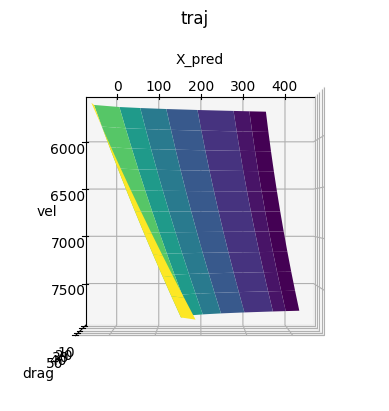

In [77]:
# Flatten the X, Y, and Z arrays
X_flat = X.flatten()
V_flat = V.flatten()
D_flat = D.flatten()


degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree, interaction_only=False)
VD_poly = poly_features.fit_transform(np.column_stack((V_flat, D_flat)))

# Perform polynomial regression
model = LinearRegression()
model.fit(VD_poly, X_flat)

# Generate predictions for the grid points
X_pred = model.predict(VD_poly)

# Reshape the predicted values back to a 2D array
X_pred = X_pred.reshape(X.shape)



# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface, ignoring NaN values
ax.plot_surface(X_pred, V, D, cmap='viridis')

# Set labels and title
ax.set_xlabel('X_pred')
ax.set_ylabel('vel')
ax.set_zlabel('drag')
ax.set_title('traj')


ax.invert_xaxis()

ax.view_init(90, 90)

# Show the plot
plt.show()

In [78]:
# Retrieve the coefficients from the trained model
coef = model.coef_
intercept = model.intercept_

# Define the equation for the prediction
equation = f"x = {intercept}"

for i, c in enumerate(coef[1:], start=1):
    power = poly_features.powers_[i]
    equation += f" + {c} * vel^{power[0]} * drag^{power[1]}"

print("Equation for the model prediction:")
print(equation)
print("Equation in python form:")
print(equation.replace('^','**'))

Equation for the model prediction:
x = 556.7332824014602 + -0.04209415269774057 * vel^1 * drag^0 + -32.55273184833307 * vel^0 * drag^1 + 5.214402001192664e-06 * vel^2 * drag^0 + 0.0015954337395696246 * vel^1 * drag^1 + 0.25991212242109135 * vel^0 * drag^2
Equation in python form:
x = 556.7332824014602 + -0.04209415269774057 * vel**1 * drag**0 + -32.55273184833307 * vel**0 * drag**1 + 5.214402001192664e-06 * vel**2 * drag**0 + 0.0015954337395696246 * vel**1 * drag**1 + 0.25991212242109135 * vel**0 * drag**2


In [80]:
def trajplot_x_vd(vel, drag):
    x = 556.7332824014602 + -0.04209415269774057 * vel**1 * drag**0 + -32.55273184833307 * vel**0 * drag**1 + 5.214402001192664e-06 * vel**2 * drag**0 + 0.0015954337395696246 * vel**1 * drag**1 + 0.25991212242109135 * vel**0 * drag**2
    
    return x

Text(0.5, 0, 'X_pred')

Text(0.5, 0.5, 'vel')

Text(0.5, 0, 'drag')

Text(0.5, 0.92, 'traj')

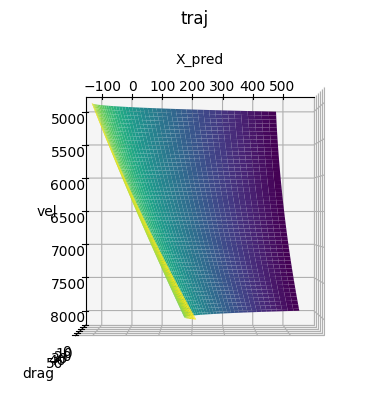

In [81]:
# Generate predictions for the grid points
V_ext = np.linspace(5000, 8000, 100)
D_ext = np.linspace(0, 50, 100)
V_ext, D_ext = np.meshgrid(V_ext, D_ext)
X_pred_ext = trajplot_x_vd(V_ext, D_ext)

# Reshape the predicted values back to a 2D array
X_pred_ext = X_pred_ext.reshape(V_ext.shape)



# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface, ignoring NaN values
ax.plot_surface(X_pred_ext, V_ext, D_ext, cmap='viridis')

# Set labels and title
ax.set_xlabel('X_pred')
ax.set_ylabel('vel')
ax.set_zlabel('drag')
ax.set_title('traj')


ax.invert_xaxis()

ax.view_init(90, 90)

# Show the plot
plt.show()

(0.0, 500.0)

(5000.0, 8000.0)

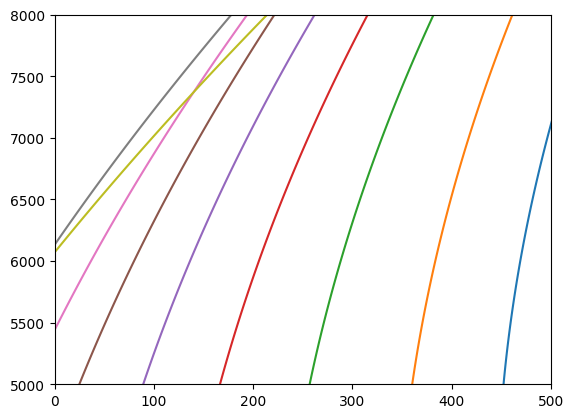

In [82]:
V_ext = np.linspace(5000, 8000, 100)

fig = plt.figure()
plt.plot(trajplot_x_vd(V_ext, 1), V_ext)
plt.plot(trajplot_x_vd(V_ext, 5), V_ext)
plt.plot(trajplot_x_vd(V_ext, 10), V_ext)
plt.plot(trajplot_x_vd(V_ext, 15), V_ext)
plt.plot(trajplot_x_vd(V_ext, 20), V_ext)
plt.plot(trajplot_x_vd(V_ext, 25), V_ext)
plt.plot(trajplot_x_vd(V_ext, 30), V_ext)
plt.plot(trajplot_x_vd(V_ext, 40), V_ext)
plt.plot(trajplot_x_vd(V_ext, 50), V_ext)

plt.xlim([0, 500])
plt.ylim([5000, 8000])



    